# Episode Duration and Streaming Services
## Import libraries

In [1]:
library(data.table)
library(ggplot2)
library(ggpubr)
library(dplyr)
library(gridExtra)


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




## Episode Duration

### Read files for original datasets

In [2]:
# change location of files for yours
tb <- fread("IMDB dataset/title.basics.tsv", na.strings = c("\\N",""), quote="")
tr <- fread("IMDB dataset/title.ratings.tsv",  na.strings = c("\\N",""), quote="")

### Treatment of datasets

In [3]:
tbtr <- merge(tb,tr, by="tconst")# merges the datasets together
tbtr = tbtr[tbtr$titleType == "tvSeries" | tbtr$titleType == "tvMiniSeries"]
tbtr <- tbtr %>% filter(tbtr$startYear > 0 & tbtr$runtimeMinutes <= 120)
head(tbtr[order(-tbtr$runtimeMinutes)])

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>
tt0046593,tvSeries,The Magical World of Disney,Disneyland,0,1954,1997,120,"Adventure,Drama,Family",8.4,2040
tt0046627,tvSeries,"Good Morning! with Will Rogers, Jr.",The Morning Show,0,1954,NA,120,"Comedy,Family,Music",6.3,14
tt0056766,tvSeries,The Jerry Lewis Show,The Jerry Lewis Show,0,1963,1963,120,Comedy,6.9,36
tt0059964,tvSeries,The Alan Burke Show,The Alan Burke Show,0,1966,1970,120,Talk-Show,7.5,17
tt0065317,tvSeries,McCloud,McCloud,0,1970,1977,120,"Action,Crime,Drama",6.9,3387
tt0066631,tvSeries,Bearcats!,Bearcats!,0,1971,1971,120,"Action,Adventure,War",7.5,189


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


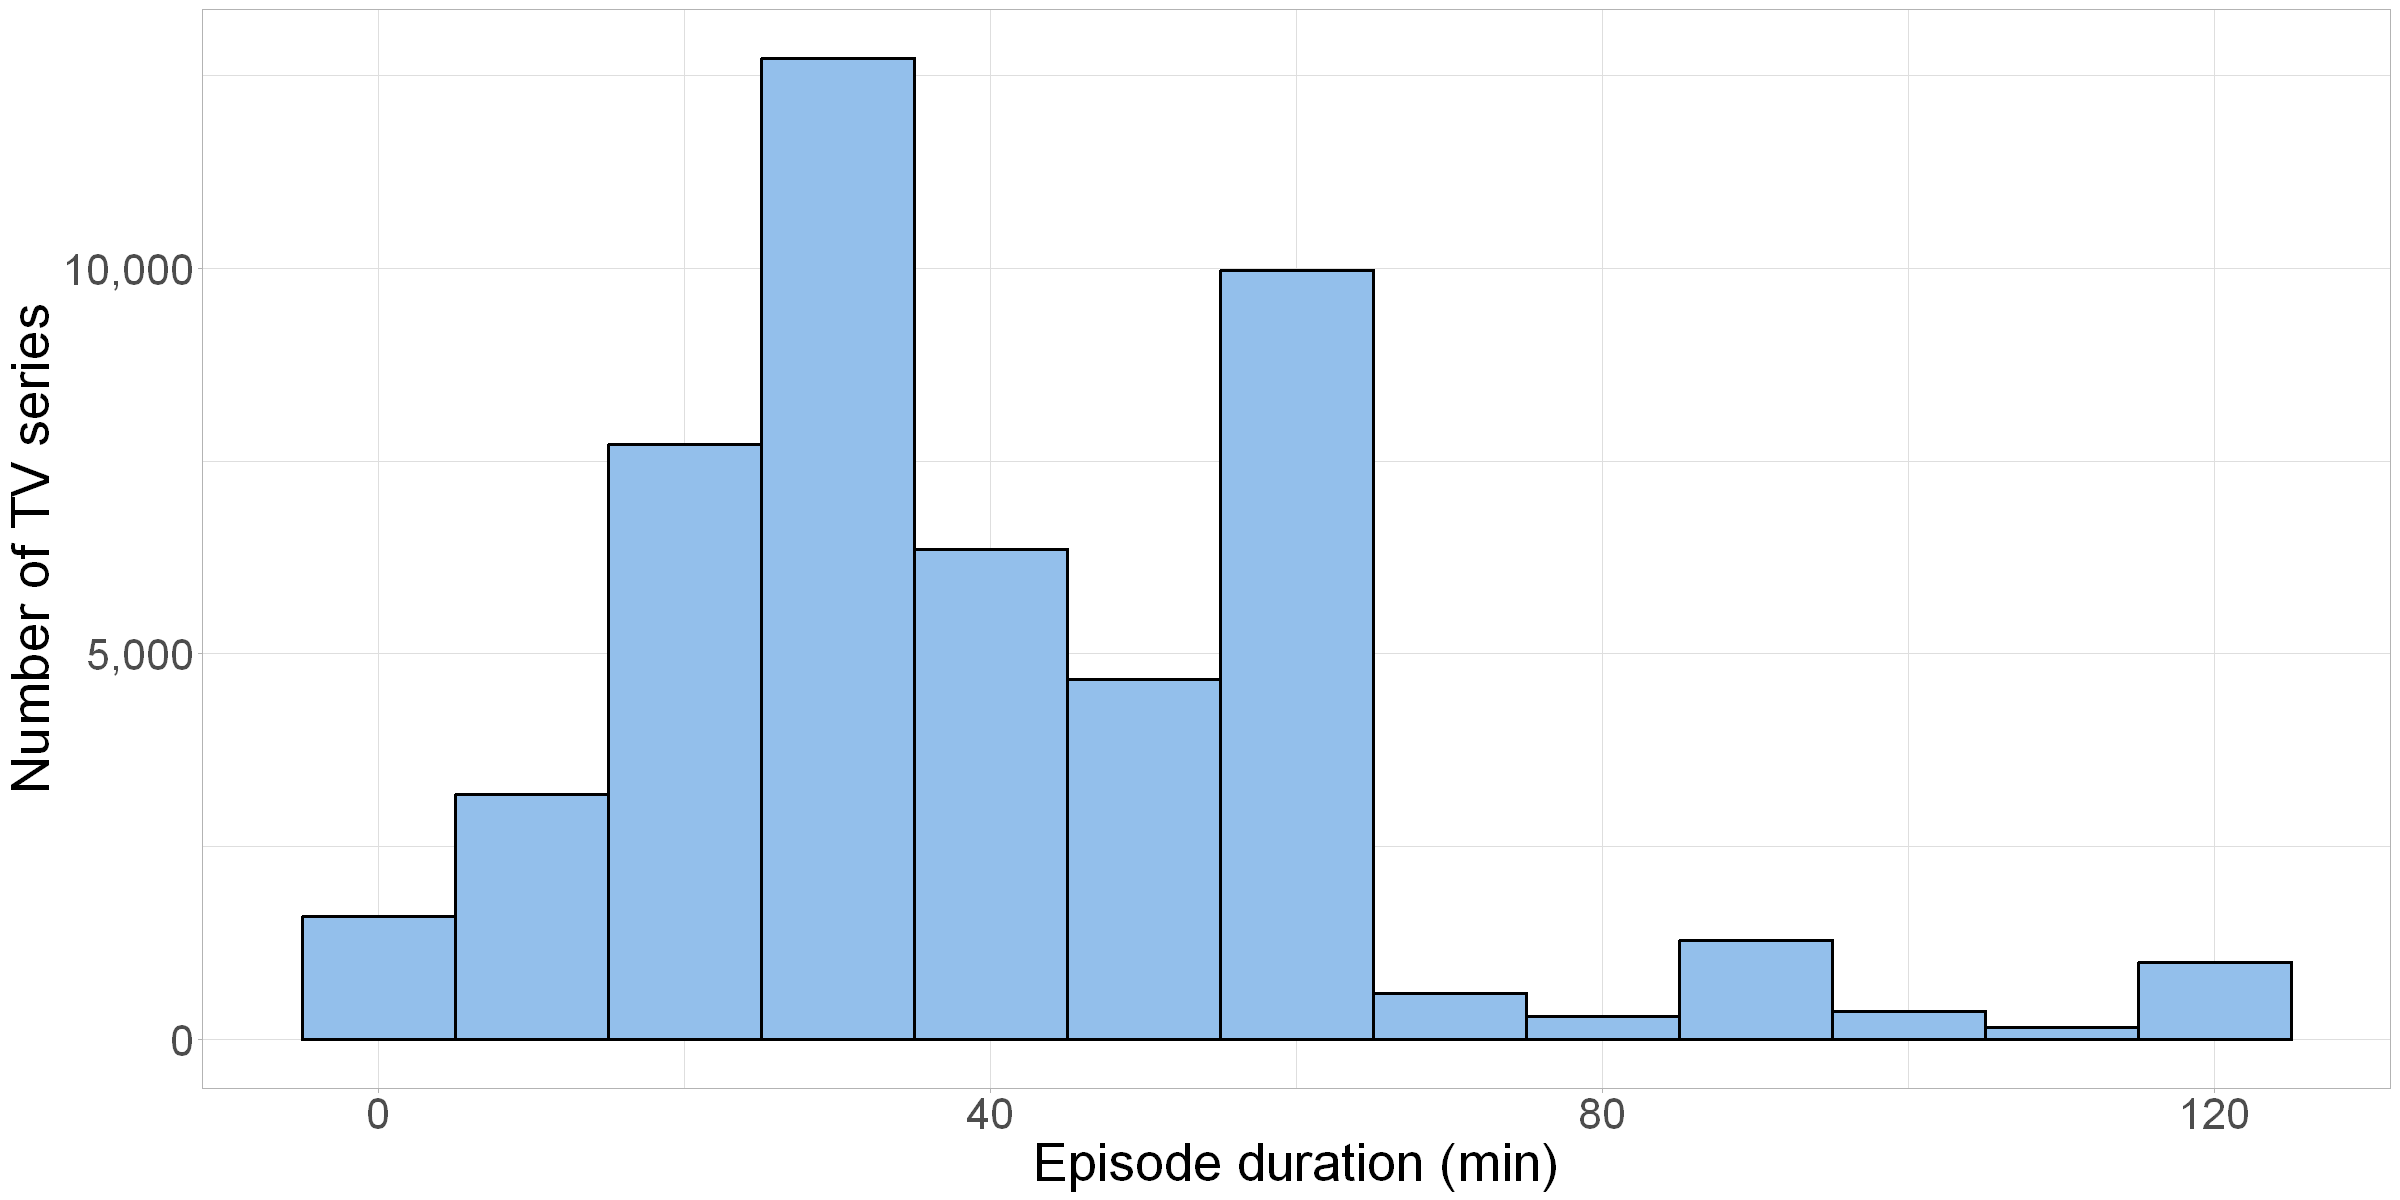

In [4]:
options(repr.plot.width=20, repr.plot.height=10)
hist = ggplot(tbtr, aes(x=runtimeMinutes)) + geom_histogram(binwidth=10, fill='#93bfeb', color='black', size = 1) + 
labs(x='Episode duration (min)', y='Number of TV series') + theme_light() +
theme(text=element_text(size=32)) + scale_y_continuous(labels=scales::comma)
hist

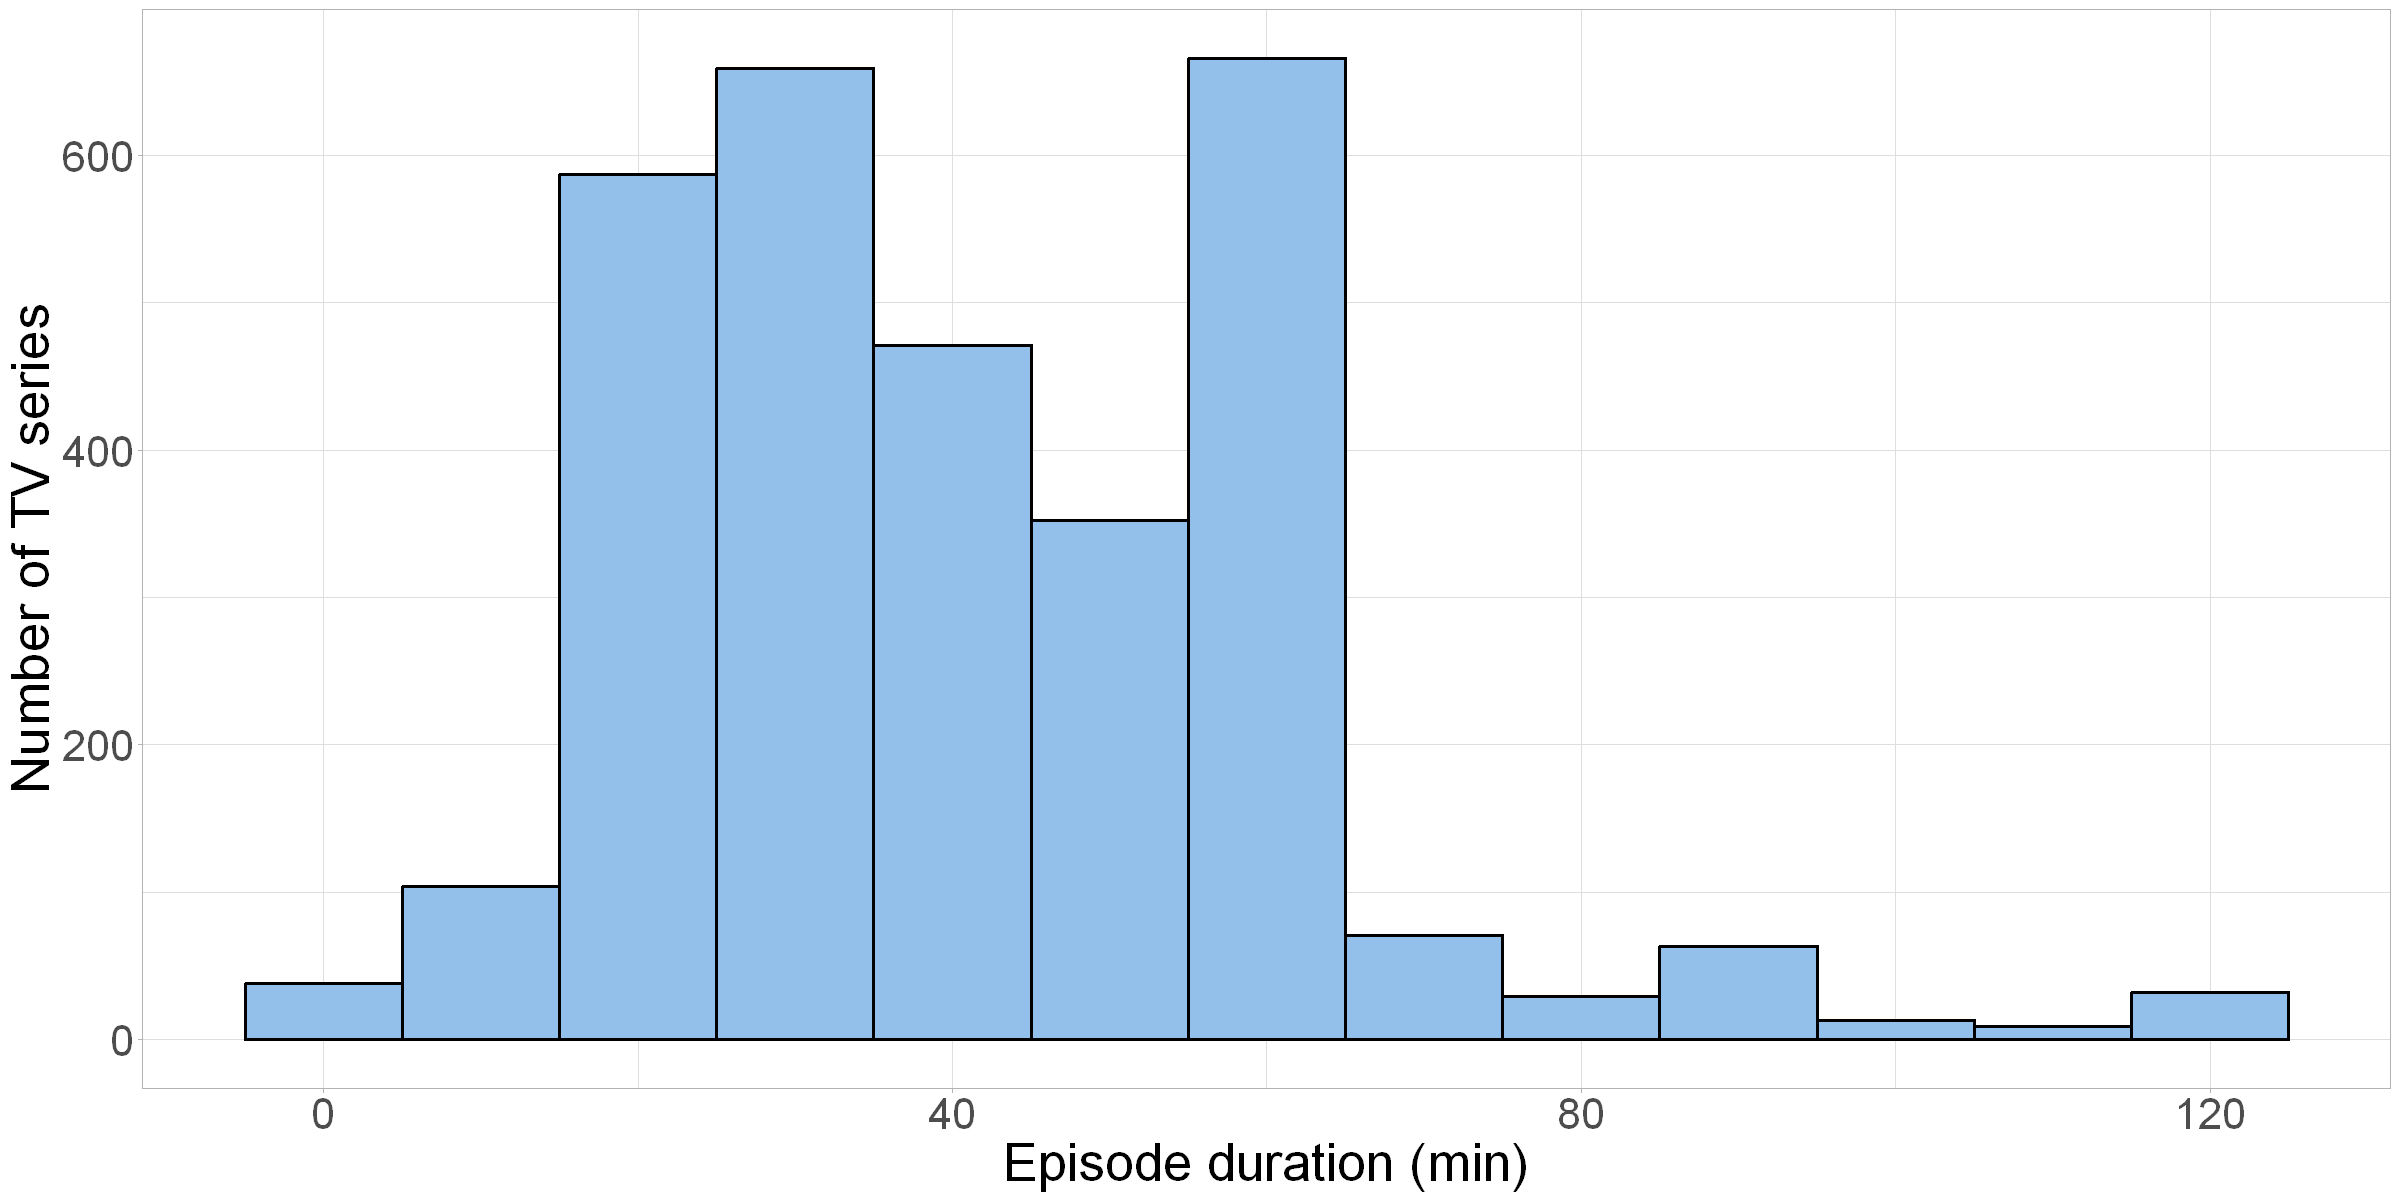

In [5]:
top = tbtr[tbtr$averageRating > quantile(tbtr$averageRating, 0.75, na.rm = T) &
                           tbtr$numVotes > quantile(tbtr$numVotes, 0.75, na.rm = T)]

top <- top %>% filter(top$startYear > 0 & top$runtimeMinutes <= 120)

hist2 = ggplot(top, aes(x=runtimeMinutes)) + geom_histogram(binwidth=10, fill='#93bfeb', color='black', size = 1) + 
labs(x='Episode duration (min)', y='Number of TV series') + theme_light() +
theme(text=element_text(size=32)) + scale_y_continuous(labels=scales::comma)
hist2

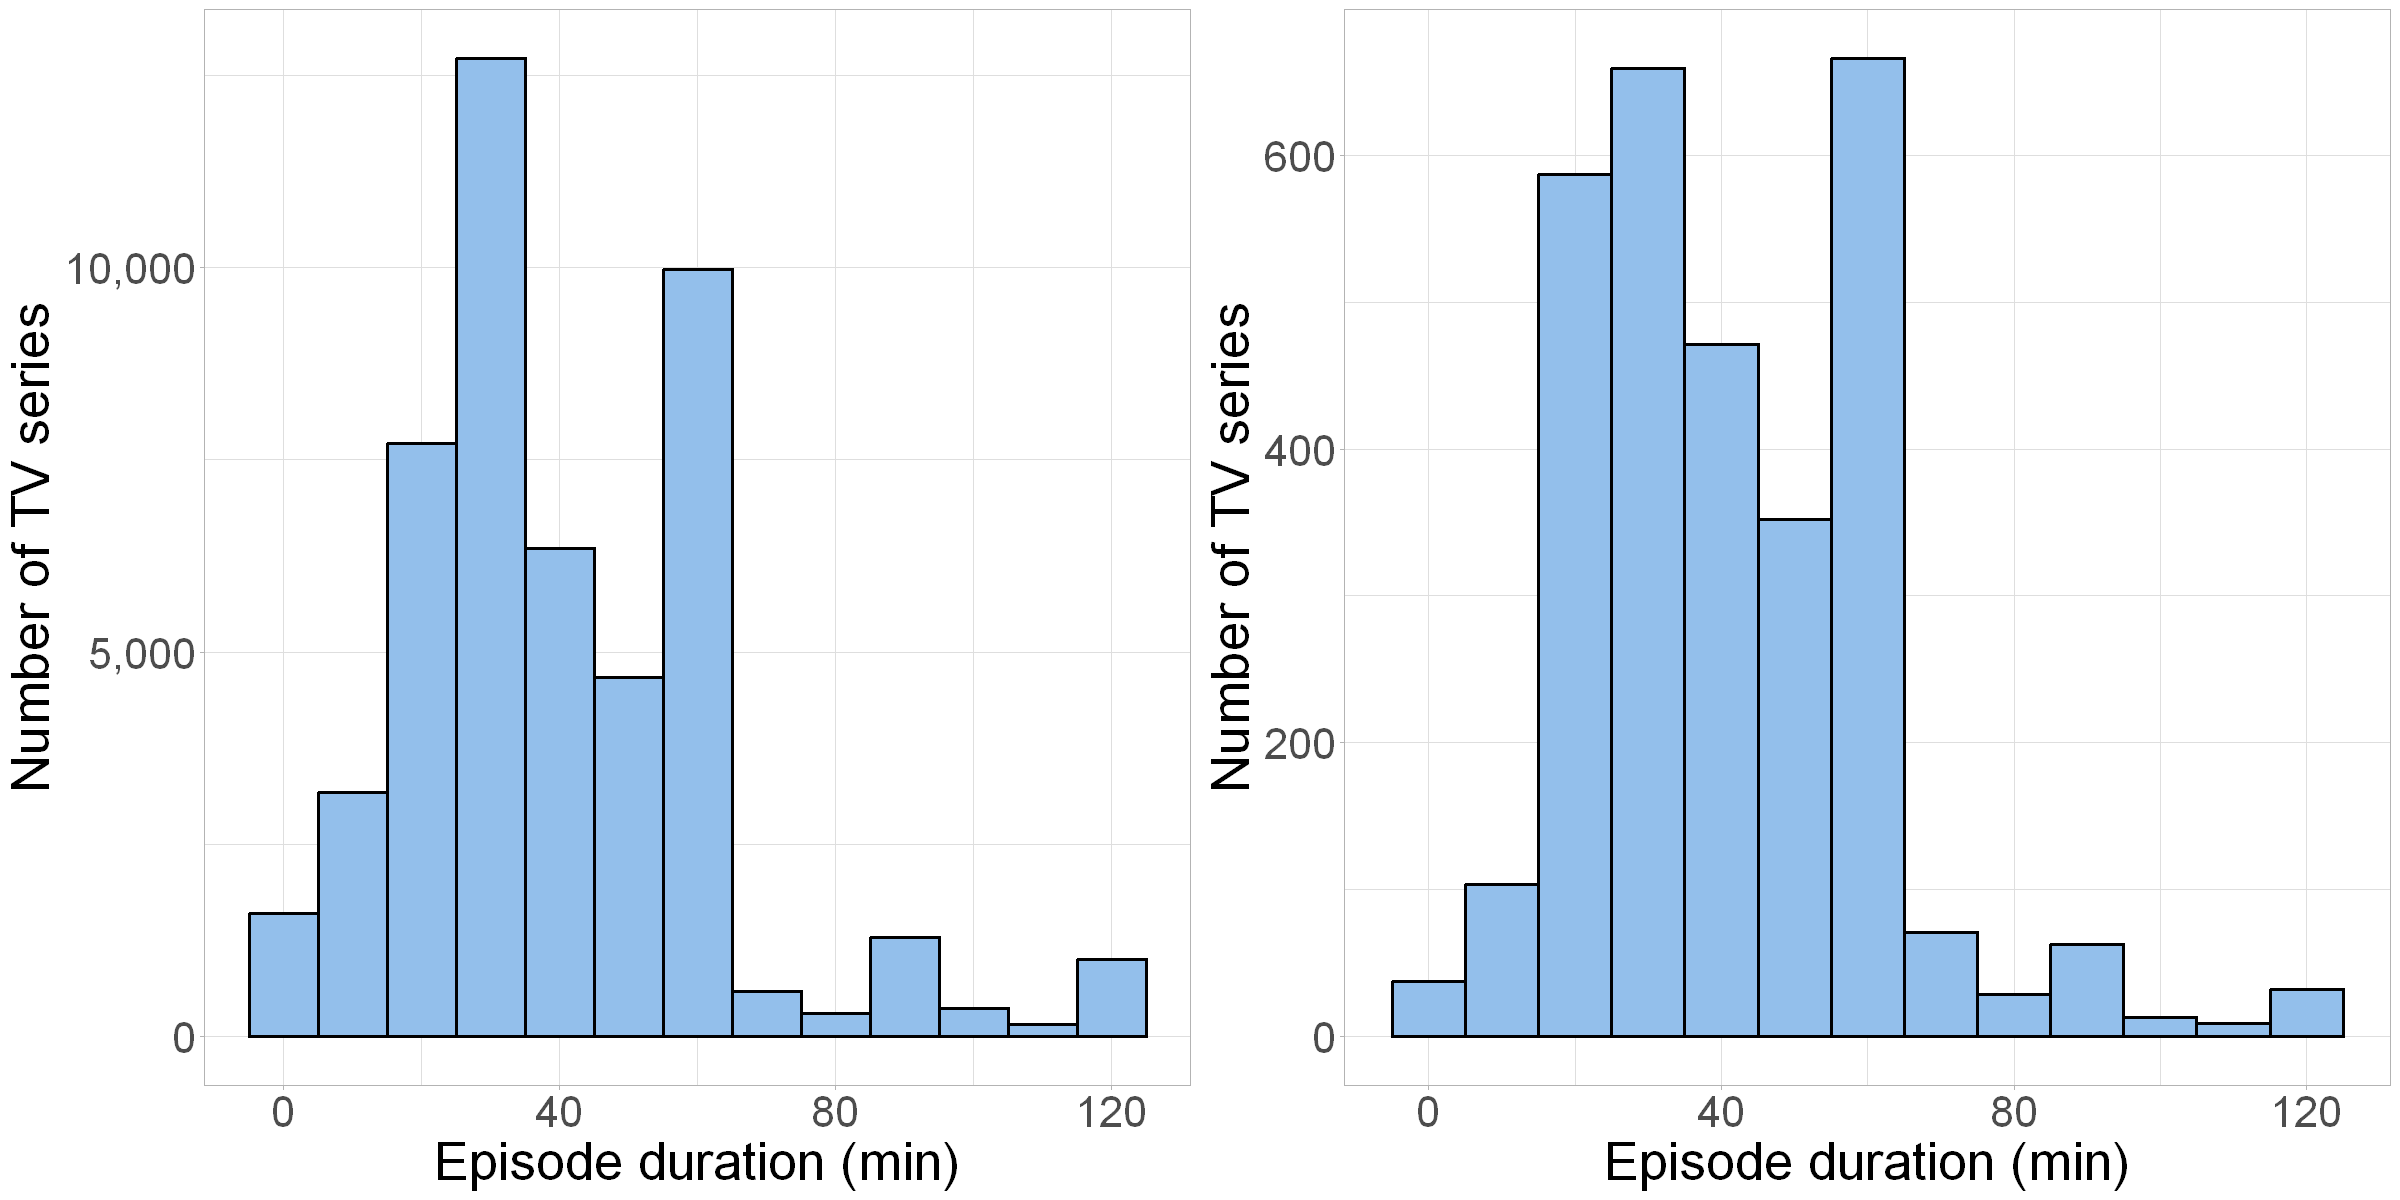

In [6]:
ggarrange(hist, hist2, ncol=2)

In [7]:
head(top[order(-runtimeMinutes)])

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>
tt0046593,tvSeries,The Magical World of Disney,Disneyland,0,1954,1997,120,"Adventure,Drama,Family",8.4,2040
tt0094433,tvSeries,China Beach,China Beach,0,1988,1991,120,"Drama,History,War",8.2,3055
tt0115355,tvSeries,Silent Witness,Silent Witness,0,1996,NA,120,"Crime,Drama,Mystery",7.9,9967
tt0146386,tvSeries,National Geographic Explorer,National Geographic Explorer,0,1985,NA,120,"Documentary,History",8.0,299
tt0163450,tvSeries,Hilda Hurricane,Hilda Furacão,0,1998,1998,120,"Comedy,Drama,Romance",8.2,428
tt0264228,tvSeries,Canada: A People's History,Canada: A People's History,0,2000,2001,120,"Documentary,History",8.7,325


### Episode Duration - Histogram with Line Plot

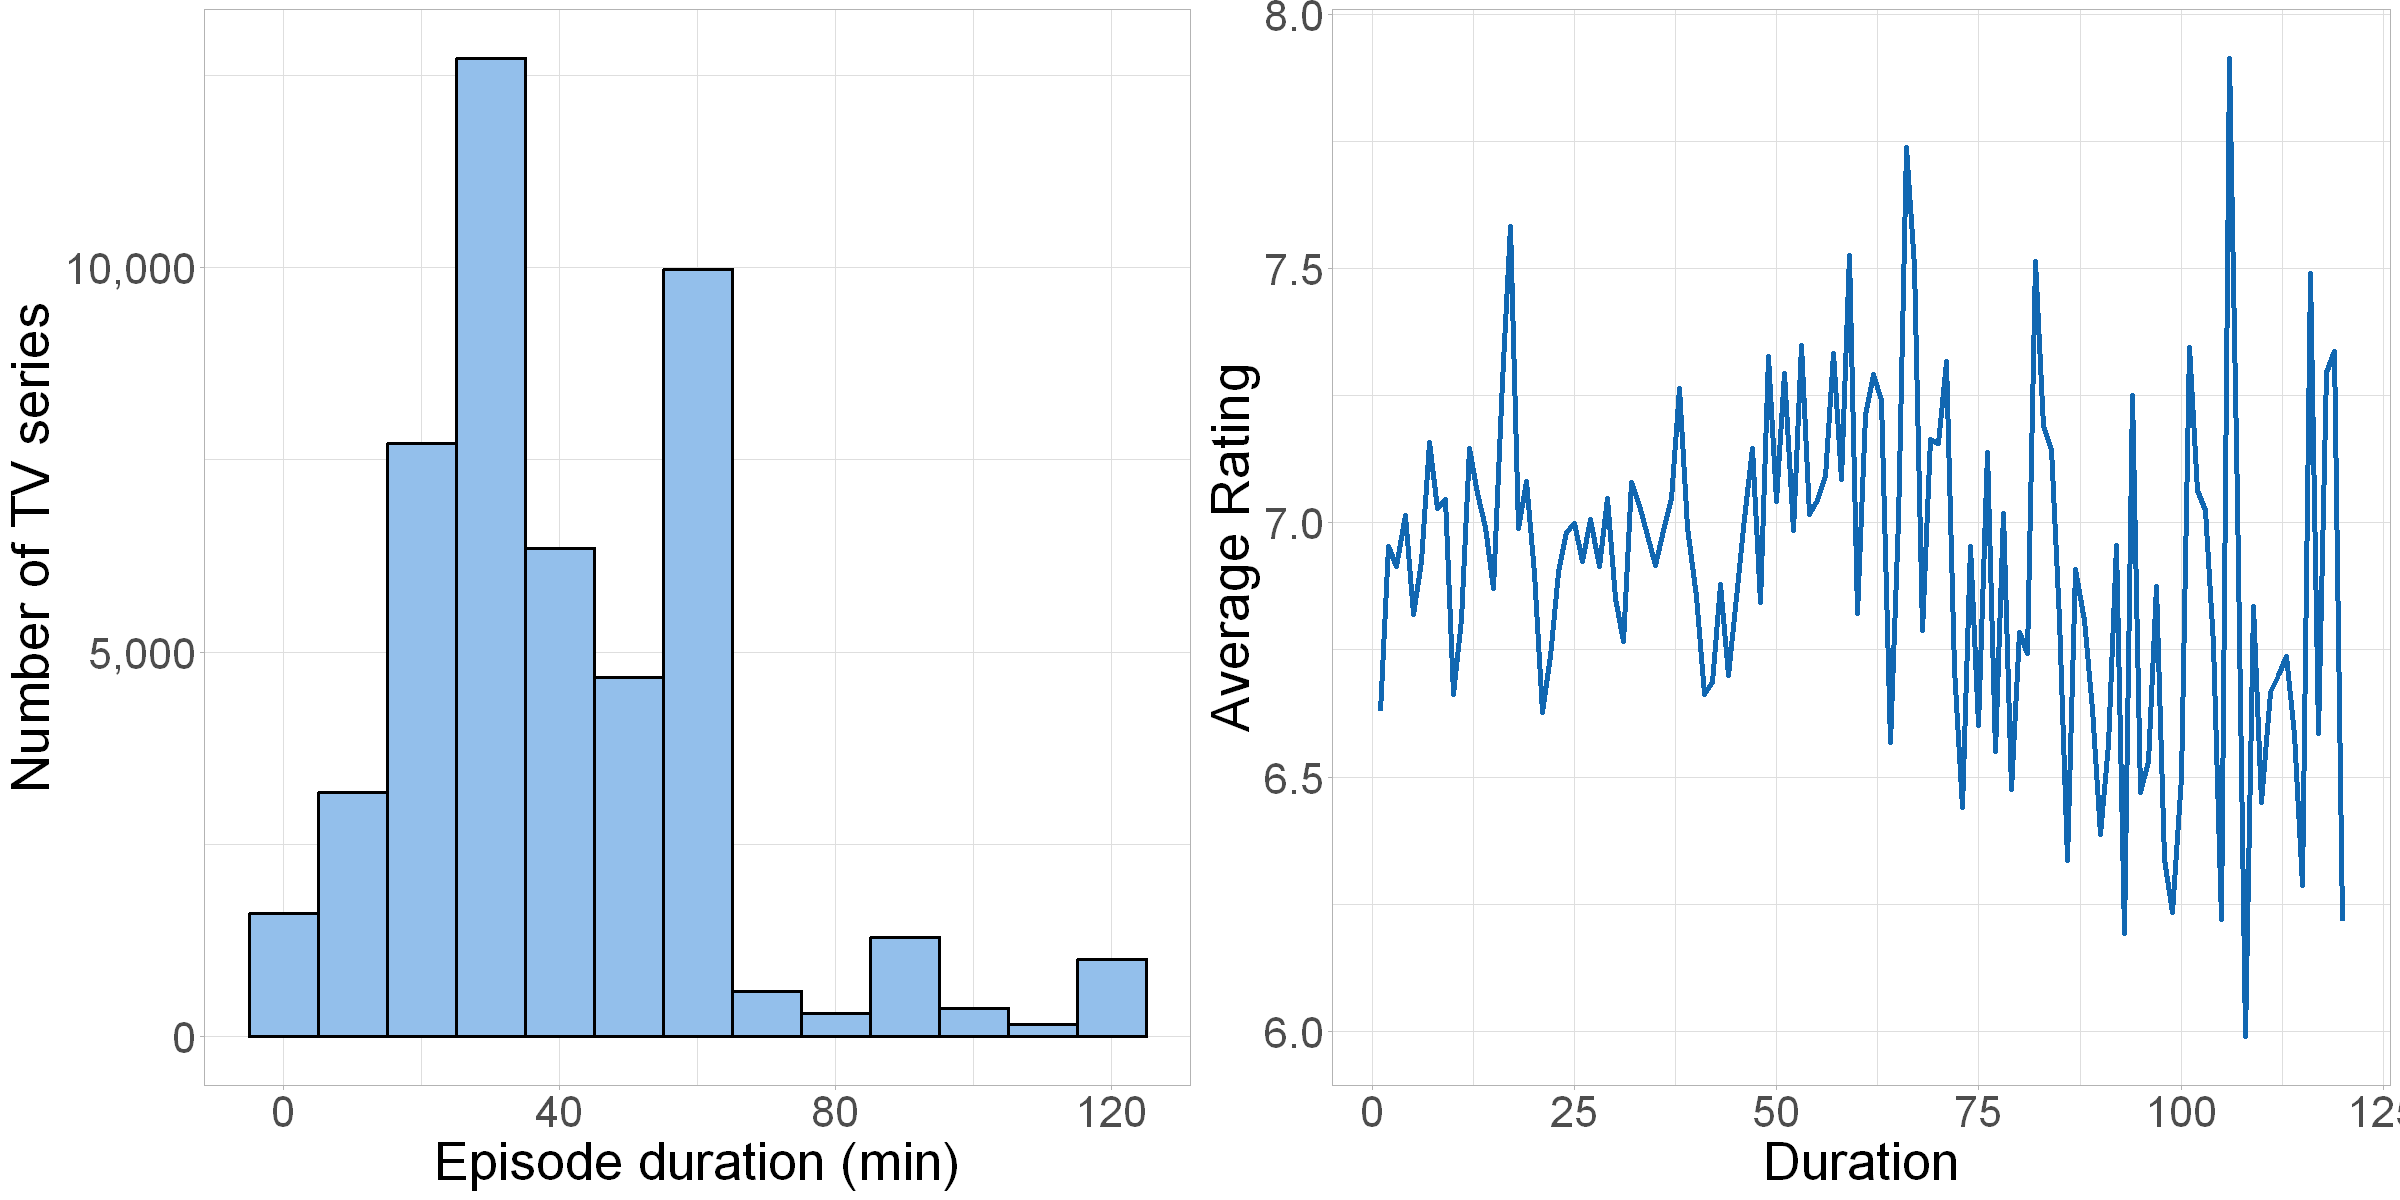

In [8]:
tbtr_mean <- tbtr %>% group_by(runtimeMinutes) %>% summarise(mean_rating = mean(averageRating))

line = ggplot(tbtr_mean, aes(x=runtimeMinutes,y=mean_rating)) + geom_line(size=1.5, color='#1167b1') +
labs(x='Duration', y='Average Rating') + theme_light() +
theme(text=element_text(size=32)) + scale_y_continuous(labels=scales::comma)

ggarrange(hist, line, ncol=2) # plot together side by side

## Streaming Services
### Read file for Streaming Services dataset

In [9]:
# change location of file for yours
tv <- fread("tv_shows.csv")
# using https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney
head(tv)

V1,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
5,6,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,1,0,1


### Treatment of dataset

In [10]:
tv2 = tv
tv2 = subset(tv2, select = c('Title','IMDb', 'Netflix','Hulu','Prime Video','Disney+'))
colnames(tv2) <- c('Title','IMDb','Netflix','Hulu','Prime.Video','Disney')
tv2$IMDb = as.numeric(substr(tv2$IMDb,1,3))
head(tv2)

Title,IMDb,Netflix,Hulu,Prime.Video,Disney
<chr>,<dbl>,<int>,<int>,<int>,<int>
Breaking Bad,9.4,1,0,0,0
Stranger Things,8.7,1,0,0,0
Attack on Titan,9.0,1,1,0,0
Better Call Saul,8.8,1,0,0,0
Dark,8.8,1,0,0,0
Avatar: The Last Airbender,9.3,1,0,1,0


In [11]:
# seperating the dataset into subsets for each streaming service
tvnet <- tv2[tv2$Netflix=='1'][,1:2]
tvnet$plat = 'Netflix'
tvhulu <- tv2[tv2$Hulu=='1'][,1:2]
tvhulu$plat = 'Hulu'
tvprime <- tv2[tv2$Prime.Video=='1'][,1:2]
tvprime$plat = 'Prime.Video'
tvdis <- tv2[tv2$Disney=='1'][,1:2]
tvdis$plat = 'Disney'
total <- rbind(tvnet,tvhulu,tvprime,tvdis)

In [12]:
head(total)
total[total$Title == 'Attack on Titan']

Title,IMDb,plat
<chr>,<dbl>,<chr>
Breaking Bad,9.4,Netflix
Stranger Things,8.7,Netflix
Attack on Titan,9.0,Netflix
Better Call Saul,8.8,Netflix
Dark,8.8,Netflix
Avatar: The Last Airbender,9.3,Netflix


Title,IMDb,plat
<chr>,<dbl>,<chr>
Attack on Titan,9,Netflix
Attack on Titan,9,Hulu


### Streaming Services - Violin Plots

Warning message:
"Removed 984 rows containing non-finite values (`stat_ydensity()`)."
Warning message:
"Removed 984 rows containing non-finite values (`stat_boxplot()`)."


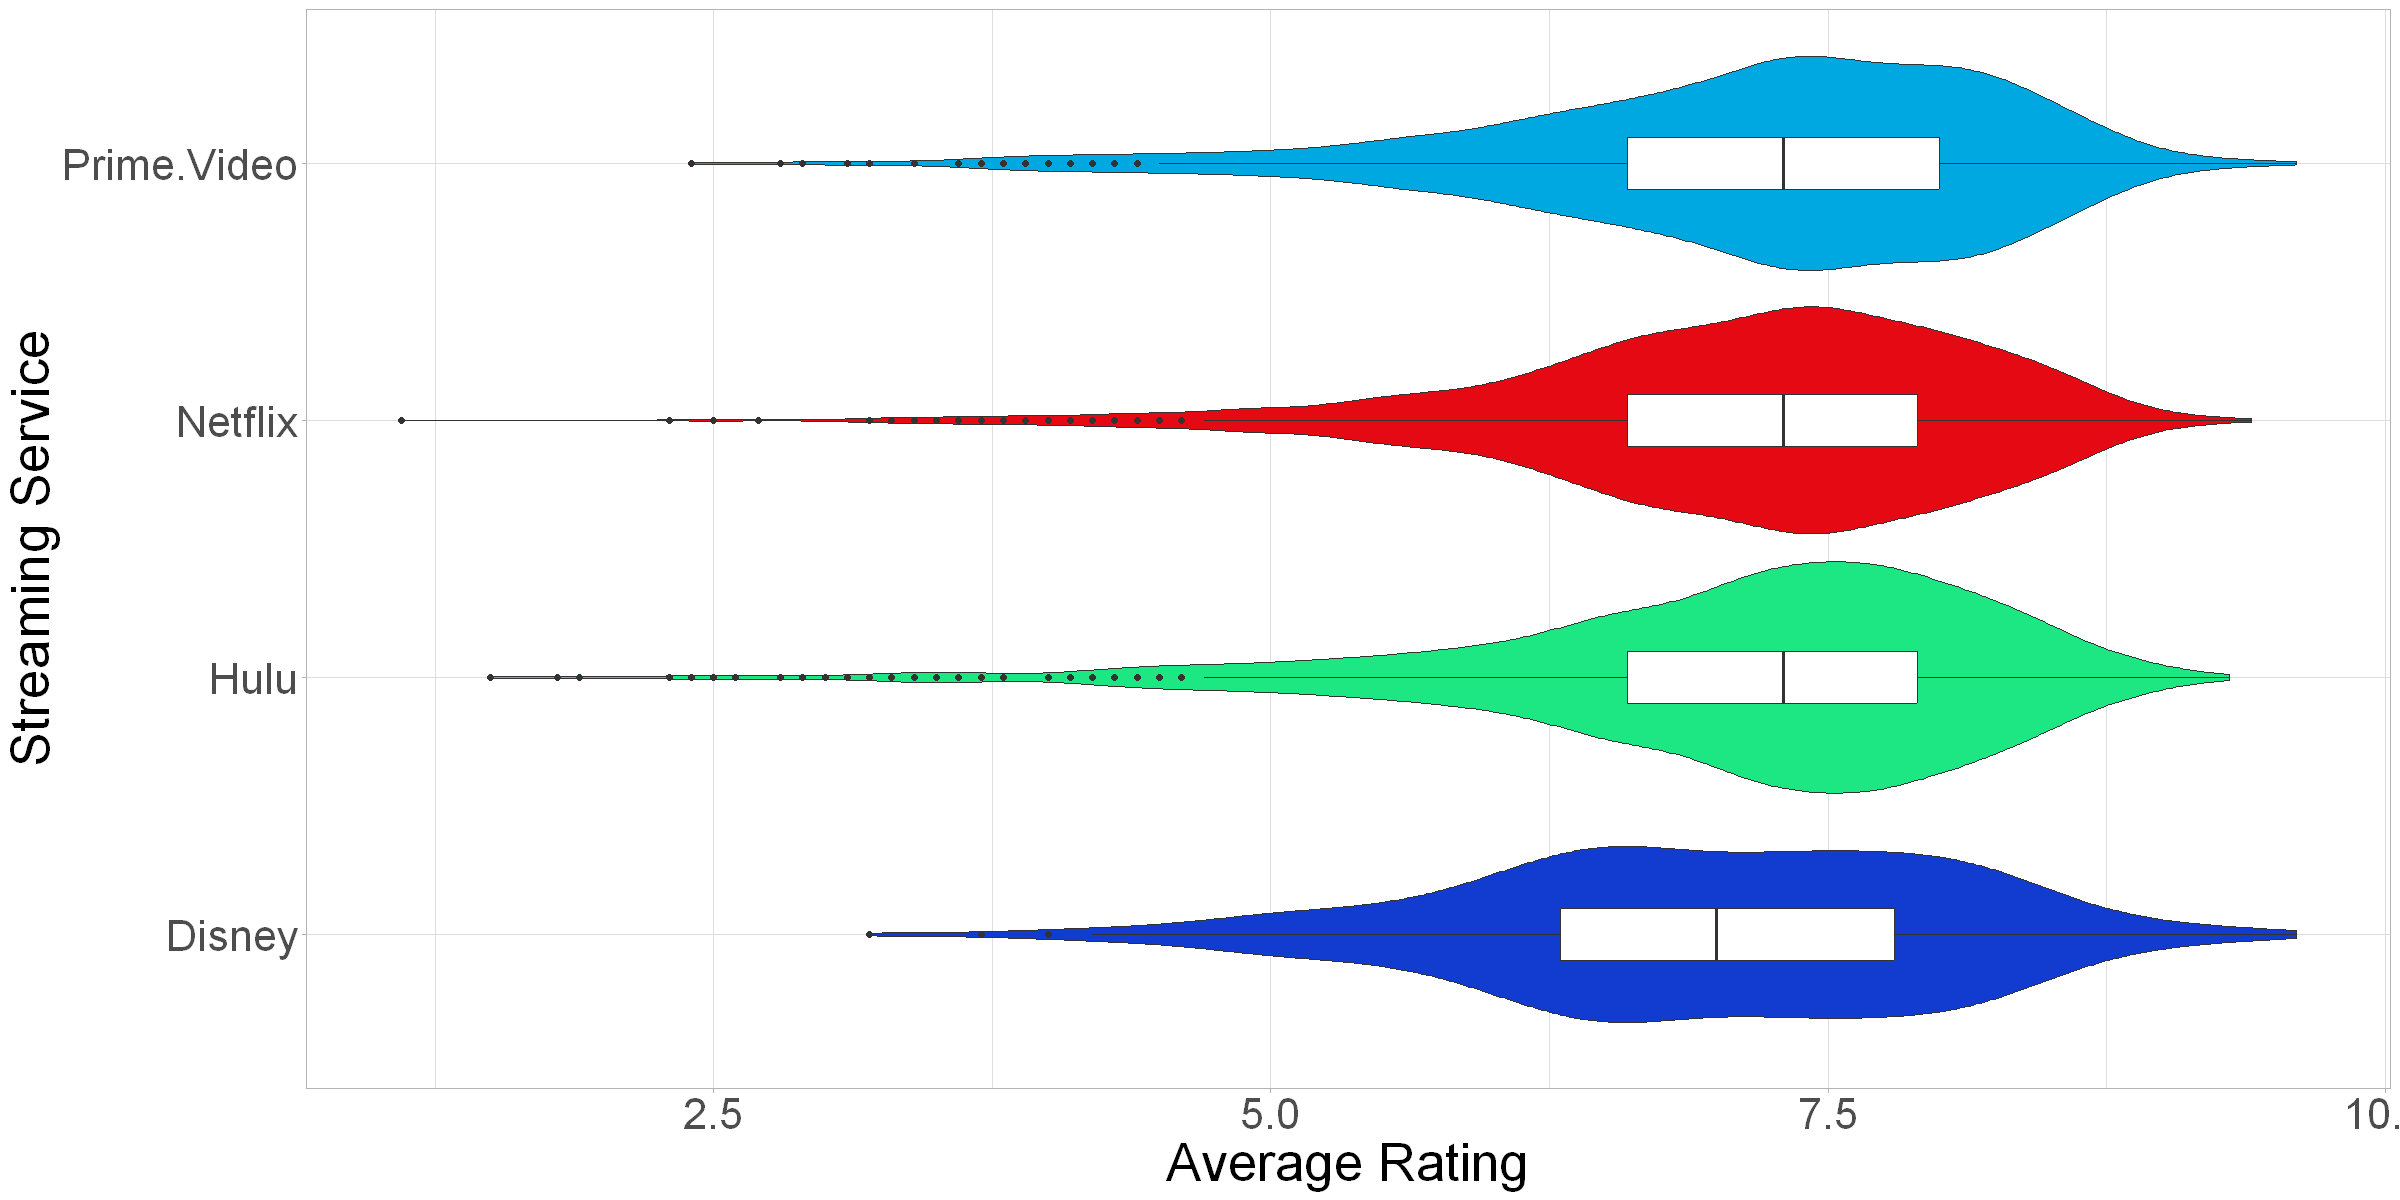

In [13]:
# violin plots for each dataset, including the original dataset (labeled General in graph)
violin = ggplot(total, aes(x=plat, y =IMDb, fill=plat)) + geom_violin() + 
coord_flip() + geom_boxplot(width=0.2, fill= 'white') + labs(x='Streaming Service', y='Average Rating') + theme_light() +
theme(text=element_text(size=32), legend.position = 'none') + scale_fill_manual(values = c('#113CCF','#1ce783','#E50914','#00A8E1'))
violin

### Streaming Services - Bar Plot

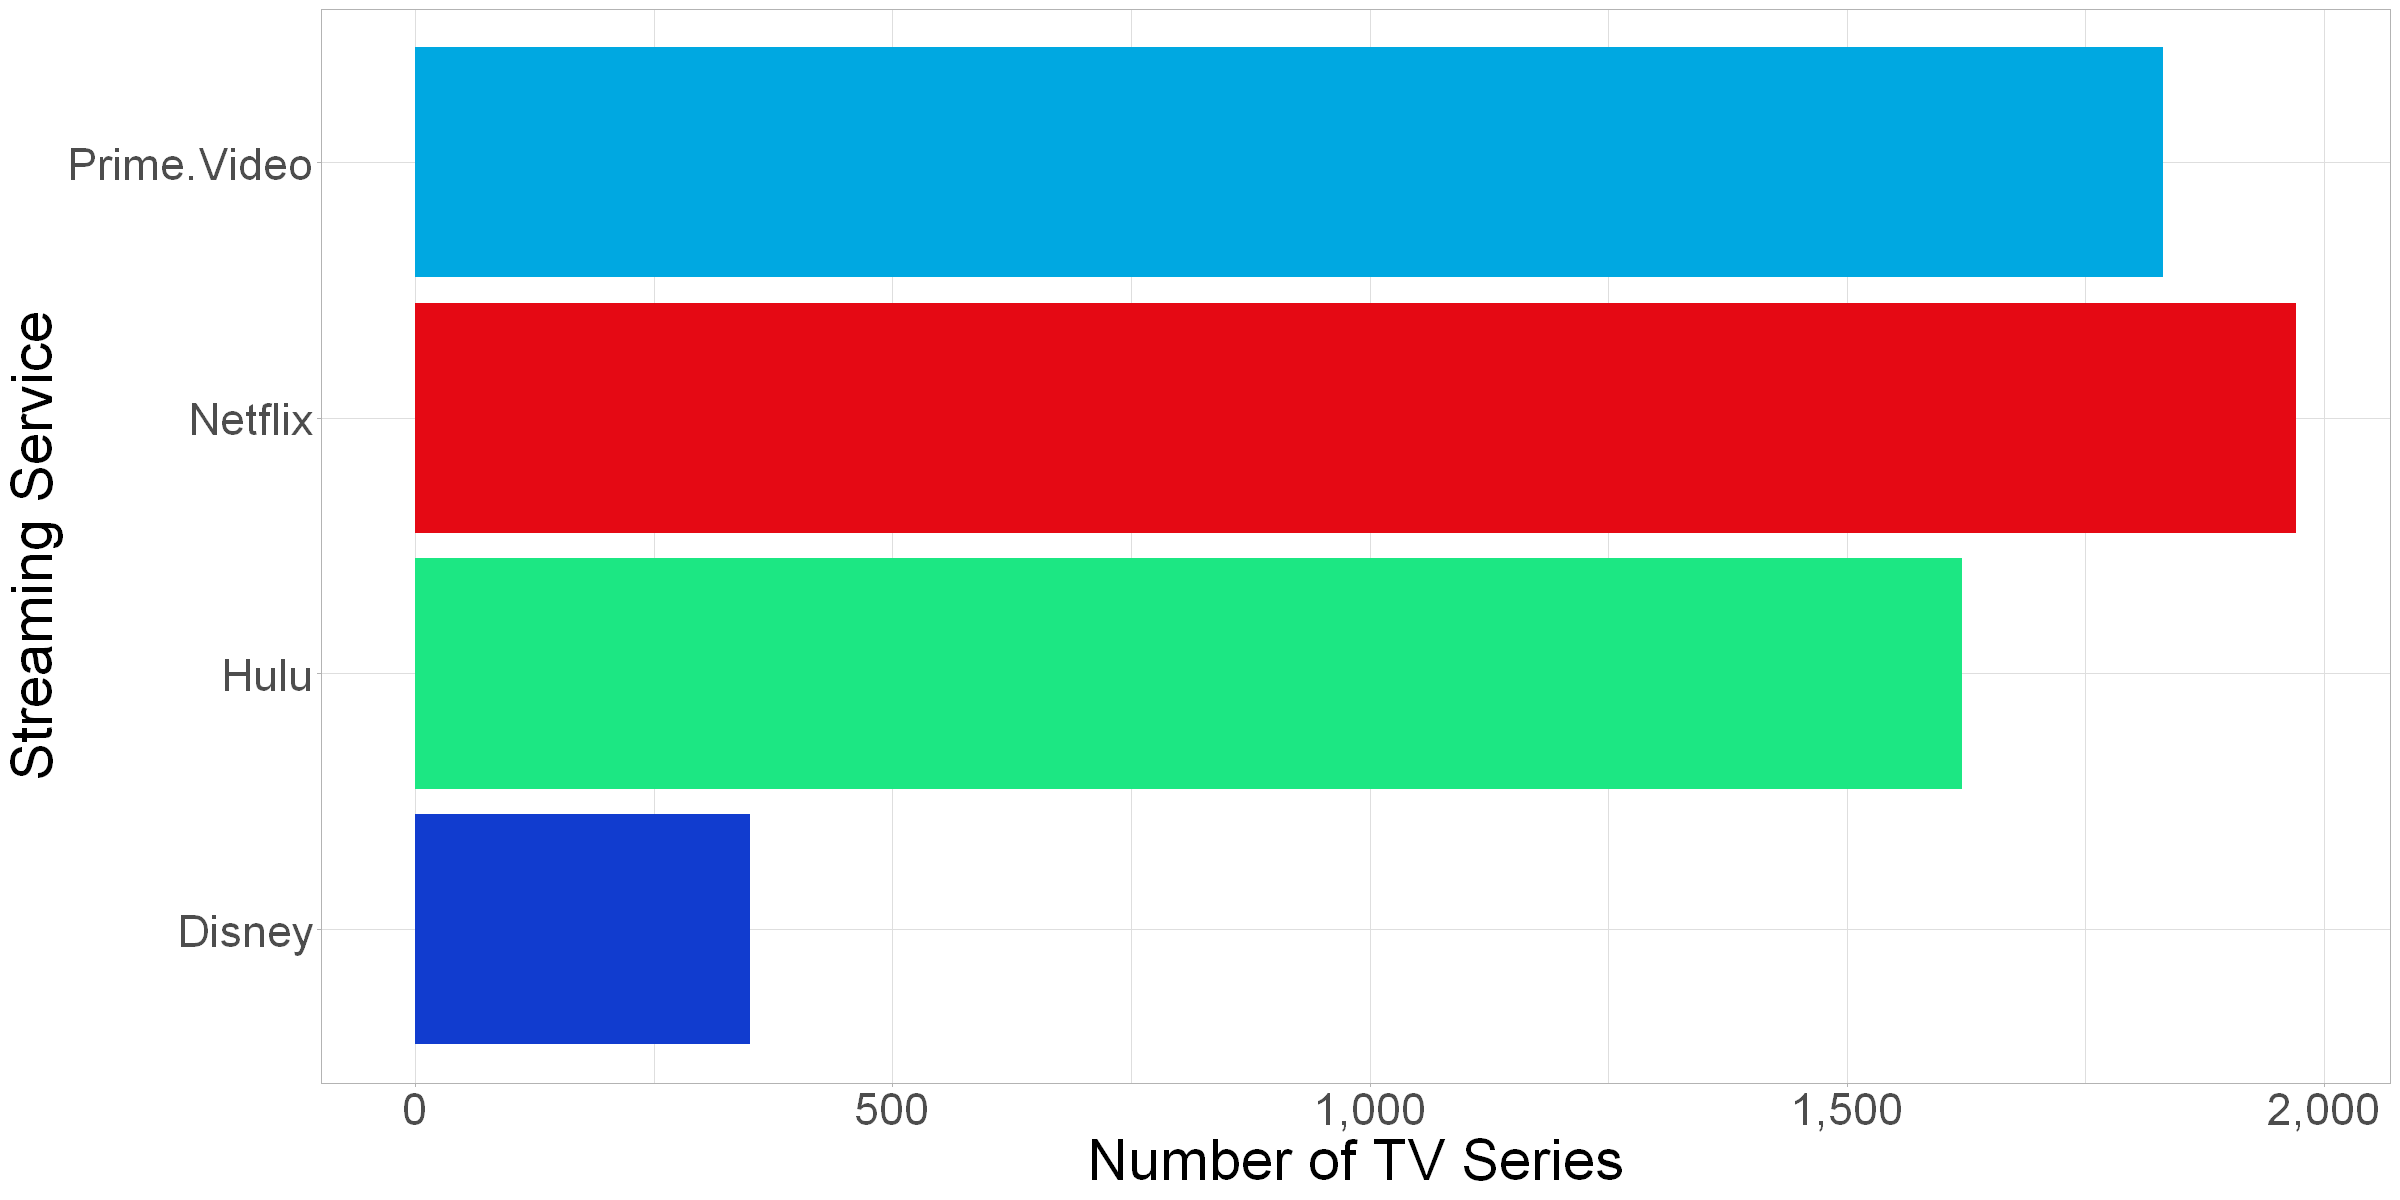

In [14]:
bar = ggplot(total, aes(x=plat,fill= plat)) + geom_bar() + theme_light() +
theme(text=element_text(size=34),legend.position = 'none') + scale_y_continuous(labels=scales::comma) +
coord_flip() + labs(x='Streaming Service', y='Number of TV Series') + scale_fill_manual(values = c('#113CCF','#1ce783','#E50914','#00A8E1'))
bar
# Net #E50914
#Hulu #1ce783
#Prime  #00A8E1
#Disney #113CCF

Warning message:
"Removed 984 rows containing non-finite values (`stat_ydensity()`)."
Warning message:
"Removed 984 rows containing non-finite values (`stat_boxplot()`)."


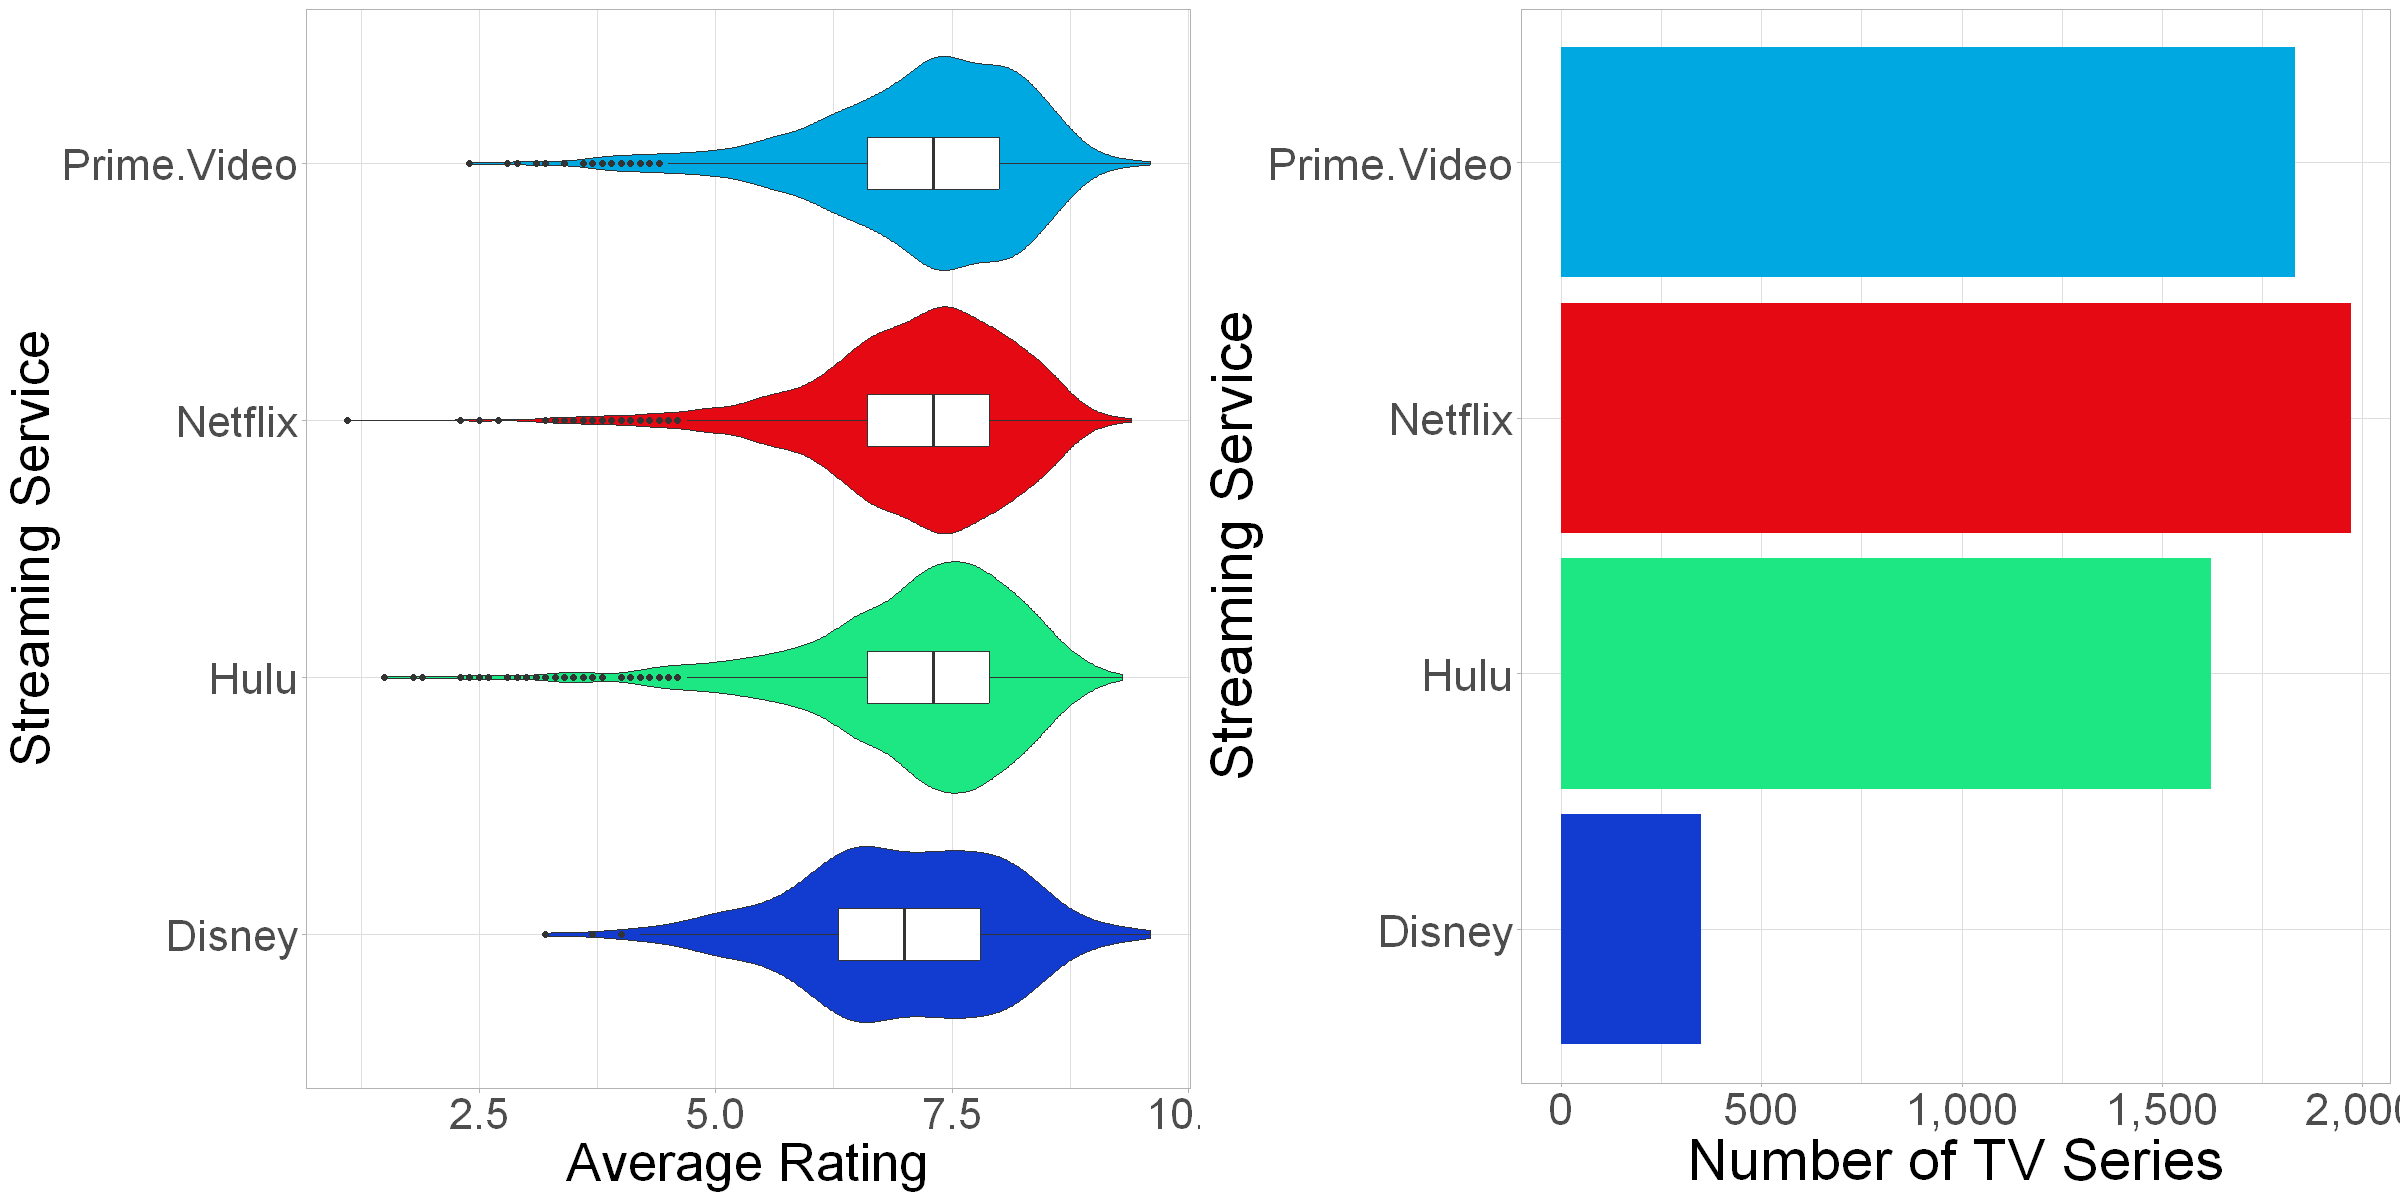

In [15]:
# Use grid.arrange to put plots in columns
grid.arrange(violin, bar, ncol=2)